In [1]:
# This notebook is for simulating Ensemble Allostery Model predictions for stability of protein domains.
# Refer to Li et al. 2017 in eLife for more information.
# In the notebook's given state, it was used to predict how DNA binding energy would change due to a 
# change in DNA-binding domain stability. Using the principles within this notebook,
# it should be relatively easy to rearrange the equations for any prediction you require.
from math import exp, log
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Model for GR C3 NTD-DBD

In [2]:
# Define some basic thermo terms
R = 1.987 # cal/(mol*K)
T = 293.15 # K

# Define the intrinsic domain stabilities and the interaction energy
# Note that this is a two domain protein, with F and DBD as its domains
delta_G_F = -7600 # F unfolding in cal/mol here. Experimental value is -7.6 +/- 0.3 kcal/mol
delta_G_DBD = -450 # DBD unfolding to low affinity state in cal/mol
delta_g_DBDF = 1300 # DBD to F coupling energy in cal/mol

In [3]:
# Define the statistical weights
SWdbd = exp(-delta_G_DBD/(R*T)) # DBD unfolding
SWF = exp(-delta_G_F/(R*T)) # F unfolding
SWdbdF = exp(-delta_g_DBDF/(R*T)) # DBD:F interaction

# The combined statistical weights for each state
K1C3 = SWF*SWdbdF # F unfolded
K2C3 = SWdbd*SWdbdF # DBD unfolded
KUC3 = SWdbd*SWF*SWdbdF # Fully unfolded

In [4]:
# Define the partition and probability functions
# "x" here is the binding partner for the F domain
def PartFuncC3(x,kd):
    return 1 + x/kd + K1C3 + K2C3*(1 + x/kd) + KUC3

def ProbDBD_Folded_C3(x,kd):
    return ((1 + x/kd) + K1C3)/(PartFuncC3(x,kd))

In [5]:
# Define the change in probability and delta-delta-G with or without "x"
def FoldChangeC3(x,kd):
    return ProbDBD_Folded_C3(x,kd)/ProbDBD_Folded_C3(0,kd)

def DeltaDeltaG_C3(x,kd):
    return R*T*log(FoldChangeC3(x, kd))

In [6]:
# Create a vector of "x" values to plot over
Concentration = 10 ** np.linspace(-9,-3) # From 10^-9 to ^-3, defaults to 50 output values
kd = 3.2 * 10**-11
ddG_out_C3 = []

for value in Concentration:
    ddG_out_C3.append(DeltaDeltaG_C3(value, kd))

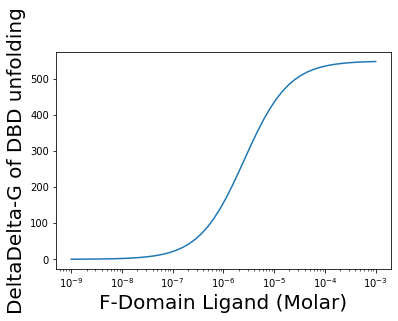

In [7]:
# Plot
fig, ax = plt.subplots()
ax.semilogx(Concentration, ddG_out_C3)
plt.xlabel('F-Domain Ligand (Molar)',fontsize = 20)
plt.ylabel('DeltaDelta-G of DBD unfolding',fontsize = 20)
plt.show()

# Now add the GR A NTD-DBD to the calculations

In [8]:
# Additional energies of unfolding or coupling (has one extra domain)
delta_G_R = -400 # R domain unfolding energy in cal/mol
delta_g_DBDR = 800 # DBD to R coupling energy in cal/mol
delta_g_RF = -320 # R to F coupling energy in cal/mol

# Additional Statistical Weights
SWR = exp(-(delta_G_R)/(R*T)) # R unfolding
SWdbdR = exp(-(delta_g_DBDR)/(R*T)) # DBD:R interaction
SWRF = exp(-(delta_g_RF)/(R*T)) # R:F interaction

# The product of the weights for each state
K1A = SWdbd*SWdbdR*SWdbdF # DBD unfolding
K2A = SWR*SWdbdR*SWRF # R unfolding
K3A = SWF*SWRF*SWdbdF # F unfolding
K4A = SWR*SWF*SWdbdR*SWRF*SWdbdF # R and F
K5A = SWdbd*SWF*SWdbdR*SWRF*SWdbdF # DBD and F
K6A = SWdbd*SWR*SWdbdR*SWRF*SWdbdF # DBD and R
KUA = SWdbd*SWR*SWF*SWdbdR*SWRF*SWdbdF # Fully unfolded

In [9]:
# Define functions
def PartFuncA(x,kd):
    return 1 + x/kd + (K1A + K2A + K6A)*(1 + x/kd) + K3A + K4A + K5A + KUA

def ProbDBDFoldedA(x,kd):
    return ((1 + x/kd)*(1 + K2A) + K3A + K4A) / (PartFuncA(x,kd))

def FoldChangeA(x,kd):
    return ProbDBDFoldedA(x,kd)/ProbDBDFoldedA(0,kd)

def DeltaDeltaG_A(x,kd):
    return R*T*log(FoldChangeA(x,kd))

In [10]:
# Simulation data
ddG_out_A = []

for value in Concentration:
    ddG_out_A.append(DeltaDeltaG_A(value, kd))

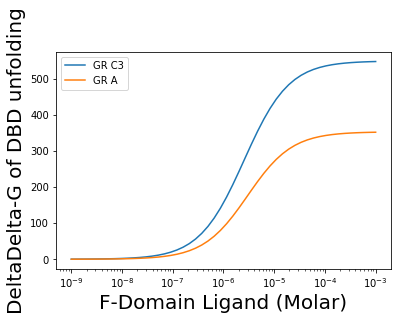

In [11]:
# Plot
fig, ax = plt.subplots()
ax.semilogx(Concentration, ddG_out_C3, Concentration, ddG_out_A)
plt.xlabel('F-Domain Ligand (Molar)',fontsize = 20)
plt.ylabel('DeltaDelta-G of DBD unfolding',fontsize = 20)
ax.legend(("GR C3", "GR A"))
plt.show()